In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_excel('1May.xlsx')
print("Read the source excel")

Read the source excel


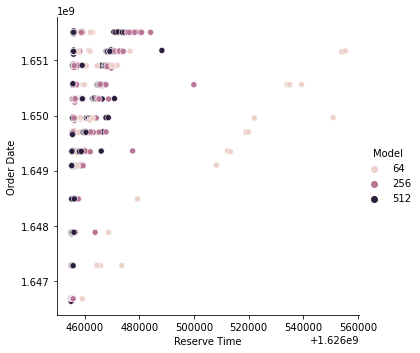

In [10]:
import seaborn as sns

sns.relplot(x="Reserve Time", y="Order Date", hue="Model", data=data)

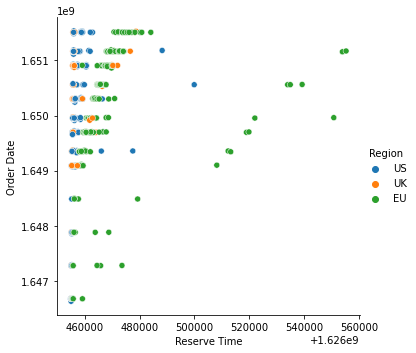

In [11]:
import seaborn as sns

sns.relplot(x="Reserve Time", y="Order Date", hue="Region", data=data)

In [12]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()
data["Region"] = ordinal_enc.fit_transform(data[["Region"]])
data["Quarter"] = ordinal_enc.fit_transform(data[["Quarter"]])
data["Model"] = ordinal_enc.fit_transform(data[["Model"]])
print("Ordinal Encode Category Columns")

Ordinal Encode Category Columns


In [14]:
y = data.iloc[:, -1]

X = data.iloc[:, 0:4]
X

,Region,Model,Reserve Time,Quarter
0,2.0,2.0,1626455238,1.0
1,2.0,2.0,1626455239,1.0
2,2.0,2.0,1626455240,1.0
3,2.0,2.0,1626455240,1.0
4,2.0,2.0,1626455243,1.0
...,...,...,...,...
922,0.0,2.0,1626458729,1.0
923,2.0,1.0,1626458734,1.0
924,0.0,2.0,1626460450,1.0
925,0.0,2.0,1626469203,1.0


In [15]:
#Do a test train split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, test_size=0.4,
                                                      random_state=0)
print("Test Train Split")

Test Train Split


In [16]:
#use linear regression to train the model and score the accuracy of the model
model = LinearRegression()
model = LinearRegression().fit(X_train, y_train)

In [17]:
r_sq = model.score(X_valid, y_valid)
print(r_sq * 100)

52.16167793288016


628573.0628595892


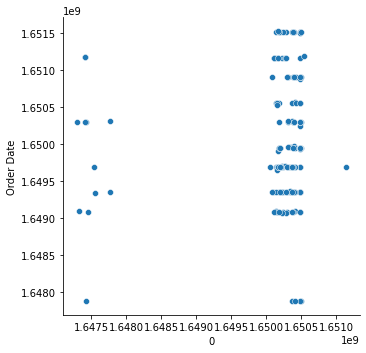

In [18]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

df1 = pd.DataFrame(preds)
df2 = pd.DataFrame(y_valid)

v = pd.concat([df2, df1],axis=1)

sns.relplot(x=0,y="Order Date", data=v)

In [19]:
#Region	Model	Timestamp	ValveEstimate
d = {'Region': 2.0, 'Model': 0.0, "Reserve Time": 1626469138, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])

res  = model.predict(df)
print("{0:.0f}".format(res[0]))


1650460242


In [63]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

my_pipeline = XGBRegressor()

my_pipeline.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [64]:
r_sq = my_pipeline.score(X_valid, y_valid.values.ravel())
print(r_sq * 100)

91.07011109678567


In [65]:
from sklearn.metrics import mean_absolute_error

preds = my_pipeline.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

130302.48096885813


In [66]:
#Region	Model	Timestamp	ValveEstimate
d = {'Region': 2.0, 'Model': 0.0, "Reserve Time": 1626469138, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])

res  = my_pipeline.predict(df)
print("{0:.0f}".format(res[0]))

1650091904


In [67]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=1)

regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=1)

In [68]:
r_sq = regr.score(X_valid, y_valid.values.ravel())
print(r_sq * 100)

52.15509069401021


In [69]:
d = {'Region': 2.0, 'Model': 0.0, "Reserve Time": 1626461964, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])

res  = regr.predict(df)
print("{0:.0f}".format(res[0]))

1649887000


In [70]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_t = sc_X.fit_transform(X_train)
y_tr = y_train.values.ravel().reshape(-1,1)
y_t = sc_y.fit_transform(y_tr)


X_v = sc_X.fit_transform(X_valid)
y_va = y_valid.values.ravel().reshape(-1,1)
y_v = sc_y.fit_transform(y_va)

In [53]:
from sklearn.svm import SVR

regressor = SVR(kernel='linear')
regressor.fit(X_t, y_t.ravel())

SVR(kernel='linear')

In [54]:
r_sq = regressor.score(X_v, y_v)
print(r_sq * 100)

-172.62049333904423


In [55]:
d = {'Region': 2.0, 'Model': 0.0, "Reserve Time": 1626461964, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])
dx = sc_X.fit_transform(df)
res  = regressor.predict(df)
print("{0:.0f}".format(res[0]))

2974652948
